## Ejercicios con Python Tarea Clase 4
### Pablo Ángel Mendoza Aguirre

In [4]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt

### Ejercicio 1
El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$
entonces se tiene que:
$$y=\frac{2}{\pi}\sin^{-1}(\sqrt x)  \longrightarrow  \sin^{2}(y\pi/2)=x,\quad 0\leq x\leq 1 $$

In [36]:
# Creamos la función que crea muestras distribuidas de acuerdo a la ecuación anterior
def T_Max_Br(y,N):
    return (np.sin((np.random.random(N)*np.pi)/2))**2

La media de le los valores aleatorios es:  0.49986262050140956


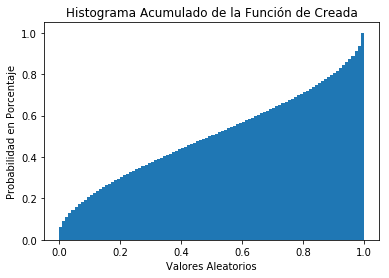

In [37]:
y = 4674 
N = 10**6 # Número de muestras
# creamos muestras exponenciales con la función creada
x = T_Max_Br(y,N)
print('La media de le los valores aleatorios es: ', np.mean(x))
# Graficamos el historial para x
plt.hist(x, bins = 100, density = True, cumulative= True)
plt.xlabel('Valores Aleatorios')
plt.ylabel('Probabilidad en Porcentaje')
plt.title('Histograma Acumulado de la Función de Creada')
plt.show()

### Ejercicio 2
Sabiendo que la distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo. Recordar que:
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$

Demostrar la validez de la siguiente ecuación
$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$
> ------

Se sabe de lo anterior 2 cosas, primero que 

$$p_i=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}\hspace{1cm} (1)$$

y también que 

$$p_{i+1}=\frac{n!}{(i+1)!(n-i-1)!}p^{i+1}(1-p)^{n-i-1} \hspace{1cm} (2)$$

sustituyendo las $i$ de la ecuación (1) por $(i+1)$. Para comprobar la validez de la ecuación planteada anteriormente, se sustituirá en ella la ecuación (1), resultando en lo siguiente: 

$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i = \frac{n-i}{i+1}\frac{p}{1-p}\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}$$ 
para simplificar lo anterior los exponenetes de $p$ se suman por la multiplicación, y los exponentes de $(n-i)$ se restan por la división como se muestra a continuación: 

$$p_{i+1}=\frac{n-i}{i+1}\frac{n!}{i!(n-i)!}p^{i+1}(1-p)^{n-i-1}$$ 

Se simplifican los factoriales de la siguiente forma $(i+1)(i!) = (i+1)!$ y a su vez $(n-i)/(n-i)! = 1/(n-i-1)!$ como se muestra en seguida:

$$ p_{i+1}=\frac{n!}{(i+1)!(n-i-1)!}p^{i+1}(1-p)^{n-i-1}$$

Se observa que el resultado anterior es igual al de la ecuación (2) mostrando la validez de la ecuación planteada inicialmente.

En la metodología mostrada anteriormente para comprobar la ecuación

$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i$$

se observó que la la recursividad de la ecuación para la distribución binomial, por medio de los factoriales y los exponentes permite que el cálculo sea facilmete simplificable reduciendo la cantidad de procedimientos para la resolución de un problema. En términos computacionales, esto implica una gran ventaja ya que hace más rápido los calculos y reduce la carga computacional significativamente.


### Ejercicio 3
Generar un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
> Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

Se sabe de lo anterior 2 cosas, primero que 

$$p_k=\frac{e^{-\lambda}(\lambda)^k}{k!}\hspace{1cm} (1)$$

y también que 

$$p_{k+1}=\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!} \hspace{1cm} (2)$$

sustituyendo las $i$ de la ecuación (1) por $(i+1)$. Para que la ecuación (2) quede de forma recursiva, es decir, en términos de $p_k$, se hace lo siguiente, se toma la ecuación (2) y se separan los factoriales de la siguiente forma $(k+1)(k!) = (k+1)!$ y a su vez se separan los exponentes, dando como resultado:

$$p_{k+1} = \frac{e^{-\lambda}(\lambda)^{k}}{k!} \frac{\lambda}{k+1} $$

Lo anterior se puede simplificar sustituyendo la ecuación (1), de forma ya es recursiva.

$$ p_{k+1} = \frac{\lambda}{k+1} p_{k} $$

In [2]:
# Función que calcula la probabilidad acumulada
def P_acum_Poisson(p,N):
    n = N
    pr = [np.exp(-p)]
    add = pr.append
    for i in range(n+1):
        add(((p)/(i+1))*pr[-1])
    return np.cumsum(pr)

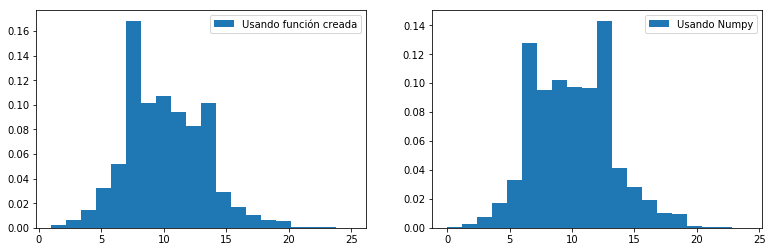

In [34]:
p = 10; N = 10**4
p_acum = P_acum_Poisson(p,N)
u = np.random.rand(N)
# Gráfica de resultados
plt.figure(figsize=[13,4])
plt.subplot(121)
d_poisson = list(map(lambda j:sum(1 for i in p_acum if i<=u[j]),range(N)))
plt.hist(d_poisson,20,density=True,label='Usando función creada')
plt.legend()

plt.subplot(122)
d_poi_numpy = np.random.poisson(p,N)
plt.hist(d_poi_numpy,20,density=True,label='Usando Numpy')
plt.legend()
np.histogram
plt.show()

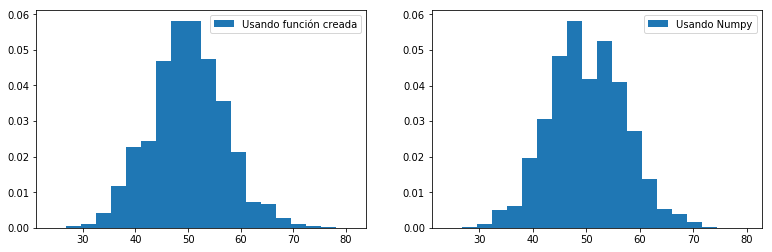

In [5]:
p = 50; N = 10**4
p_acum = P_acum_Poisson(p,N)
u = np.random.rand(N)
# Gráfica de resultados
plt.figure(figsize=[13,4])
plt.subplot(121)
d_poisson = list(map(lambda j:sum(1 for i in p_acum if i<=u[j]),range(N)))
plt.hist(d_poisson,20,density=True,label='Usando función creada')
plt.legend()

plt.subplot(122)
d_poi_numpy = np.random.poisson(p,N)
plt.hist(d_poi_numpy,20,density=True,label='Usando Numpy')
plt.legend()
np.histogram
plt.show()

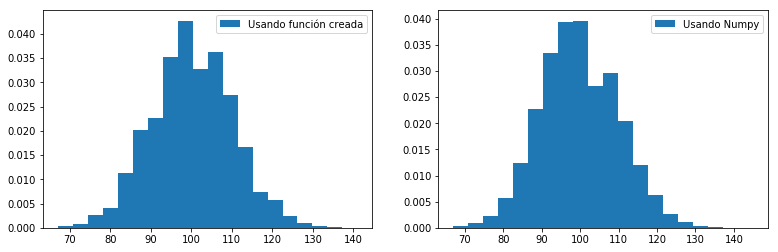

In [6]:
p = 100; N = 10**4
p_acum = P_acum_Poisson(p,N)
u = np.random.rand(N)
# Gráfica de resultados
plt.figure(figsize=[13,4])
plt.subplot(121)
d_poisson = list(map(lambda j:sum(1 for i in p_acum if i<=u[j]),range(N)))
plt.hist(d_poisson,20,density=True,label='Usando función creada')
plt.legend()

plt.subplot(122)
d_poi_numpy = np.random.poisson(p,N)
plt.hist(d_poi_numpy,20,density=True,label='Usando Numpy')
plt.legend()
np.histogram
plt.show()